League of Legends is a popular free-to-play competitive MOBA (multiplayer online battle arena) game where two teams of 5 players, with their respective champion, compete to take the opposing team's base. There are many factors that could cater to the team's advantages such as objectives, kills, assists and gold income. It is often speculated that teams with more crowd control effects, such as knock-ups, stuns, sleeps, etc. are more advantageous in winning the game. In addition, it is also been observed that playstyles generally differ by region, with teams prioritizing different aspects of a game compared to other regions. In essence, I would like to compare playstyles in terms of crowd control in each region.

The .csv file is uploaded to my Google Drive, so I am utilizing mounting my Google Drive to Colab in order to access the dataset.

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Imported any necessary Python libraries to help with analysis, as well as using Pandas library to import and read the dataset.

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [ ]:
!pip install scikit-posthocs

In [ ]:
import scikit_posthocs as sp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data exploring and some cleaning

In [ ]:
league_df = pd.read_csv('/content/gdrive/MyDrive/THINKFUL/First capstone stuff/10.16_LeagueOfLegends_Games.csv', sep = ';')

Here's a preview of what the dataset looks like.

In [ ]:
league_df.head()

,gameId,t1p1_accountId,t1p1_assists,t1p1_ban_champId,t1p1_champId,t1p1_champLevel,t1p1_damageDealtToObjectives,t1p1_damageDealtToTurrets,t1p1_damageSelfMitigated,t1p1_deaths,t1p1_goldEarned,t1p1_item0,t1p1_item1,t1p1_item2,t1p1_item3,t1p1_item4,t1p1_item5,t1p1_item6,t1p1_kills,t1p1_lp,t1p1_magicDamageDealt,t1p1_magicDamageDealtToChampions,t1p1_magicalDamageTaken,t1p1_min10_creeps,t1p1_min10_damagetaken,t1p1_min10_gold,t1p1_min10_xp,t1p1_min15_creeps,t1p1_min15_damagetaken,t1p1_min15_gold,t1p1_min15_xp,t1p1_neutralMinionsKilled,t1p1_perk0,t1p1_perk1,t1p1_perk2,t1p1_perk3,t1p1_perk4,t1p1_perk5,t1p1_perkPrimaryStyle,t1p1_perkSubStyle,...,t2p5_min15_gold,t2p5_min15_xp,t2p5_neutralMinionsKilled,t2p5_perk0,t2p5_perk1,t2p5_perk2,t2p5_perk3,t2p5_perk4,t2p5_perk5,t2p5_perkPrimaryStyle,t2p5_perkSubStyle,t2p5_physicalDamageDealt,t2p5_physicalDamageDealtToChampions,t2p5_physicalDamageTaken,t2p5_role,t2p5_spellId1,t2p5_spellId2,t2p5_summonerId,t2p5_summonerName,t2p5_timeCCingOthers,t2p5_totalDamageDealt,t2p5_totalDamageDealtToChampions,t2p5_totalDamageTaken,t2p5_totalHeal,t2p5_totalMinionsKilled,t2p5_totalTimeCrowdControlDealt,t2p5_trueDamageDealt,t2p5_trueDamageDealtToChampions,t2p5_trueDamageTaken,t2p5_visionScore,t2p5_wardsKilled,t2p5_wardsPlaced,gameCreation,gameDuration,gameVersion,platformId,queueId,average_lp,t1_teamId,t1_win
0,4747415735,j7A9NCAnShAbuQuEtlPMwVGqUiHAyEUdI_OEe79ToX-gkeI,7,121,25,11,166,0,12783,5,6206,3158,3157,3860,3114,2055,1028,3364,0,3527,7190,4185,5140,1.0,168.9,160.8,206.8,1.70,458.00,272.80,352.65,0,8465,8463,8473,8451,8347,8313,8400,8300.0,...,364.40,611.30,4,8230,8275,8210,8236,8313,8316,8200,8300.0,17836,2392,10540,TOP,4,12,uBw-GlxtC5Kesy_fs9c5OjkI3OUgpJp_yleqNNXGLY22aC8,Lugerr,18,81062,10920,17664,3407,159,49,2628,223,439,13,0,10,1.596750e+12,1738,10.16.330.9186,EUW1,420,3380.4,100,0
1,4747759040,LkRqeoIcbTZeArlKA80SnOuMcUhI4tPl_0rkVCKpyepB8g,21,111,37,13,5397,2879,8793,5,7861,1001,3174,3504,3853,3114,1082,3364,2,3269,20349,7145,3677,0.2,283.2,216.9,323.7,0.50,638.35,402.10,528.10,0,8214,8226,8210,8237,8017,8009,8200,8000.0,...,529.25,670.60,0,8010,9111,9105,8299,8275,8234,8000,8200.0,90495,11728,14247,TOP,4,6,06WjmoUKEGBDMYl5jyKp072IpUnGNuWGml1bvcNOzA9MhX7W,KCorp Adam,14,94923,12340,20933,2530,167,43,4428,612,2402,11,2,6,1.596760e+12,1374,10.16.330.9186,EUW1,420,3284.9,100,1
2,4746336268,IhcGDHrSIFZc3c5g4r_ljnBNfe1bgcBqwg0KwkZdj_q5BA,11,122,89,11,3030,1038,23864,7,6673,3193,3857,3105,3009,2055,1033,3364,0,3309,7639,2771,9725,1.2,349.7,187.7,222.7,1.85,687.05,317.90,342.20,0,8439,8446,8473,8451,8313,8316,8400,8300.0,...,452.25,697.15,12,8005,9111,9105,8299,8444,8451,8000,8400.0,111812,9411,19357,TOP,12,4,iEgpsRC6y8xFeyIJ65MPSaKpkt_X1Xi1BCPPxknRTAqFr_c,PyosikClidNoltey,13,122806,10858,28087,4317,169,90,6708,180,667,27,5,13,1.596720e+12,1692,10.16.330.9186,EUW1,420,3333.2,100,0
3,4756259885,TC1II2bhaFaQ4q-jQi_GUxV7rgrRToiBC-3qAy18Melt25A,11,81,89,11,1253,1253,14012,4,6720,3860,3050,3109,2055,3047,0,3364,1,3280,10735,3146,4744,1.5,354.4,196.9,242.5,2.15,690.30,358.05,448.25,0,8439,8463,8429,8242,8347,8306,8400,8300.0,...,552.00,707.45,4,8010,9111,9105,8014,8242,8473,8000,8400.0,94714,10774,11710,TOP,4,6,06WjmoUKEGBDMYl5jyKp072IpUnGNuWGml1bvcNOzA9MhX7W,KCorp Adam,16,100263,11699,18700,3499,184,60,5406,846,2200,7,1,5,1.597160e+12,1383,10.16.330.9186,EUW1,420,3258.1,100,1
4,4756423982,JFMI-NomU4kwSVK5T7JvmYlIiTWQFPo47BoKnMRtz_cKNA,11,91,25,11,260,260,9350,6,6748,0,3028,3860,2065,3158,3108,3364,2,3067,9097,4738,7939,1.2,333.0,222.4,261.5,1.70,640.45,349.65,385.40,0,8465,8463,8473,8242,8313,8347,8400,8300.0,...,522.75,754.80,5,8010,8009,9105,8299,8304,8345,8000,8300.0,7792,1329,11431,TOP,4,12,75VNatV2_0MCZAd6qwBy5lNzJwgqh1l6eZ-kk4FtjmH6S3kK,TwTv Drututt,21,143958,22217,16959,6275,227,409,5682,0,1854,14,2,9,1.597160e+12,1672,10.16.330.9186,EUW1,420,3116.0,100,0


As we can see, this is a large dataset consisting of 60,156 records and 609 columns. We are looking for specific stats within this columns, so we are only going to use a select number of columns and aggregate them.

In [ ]:
league_df.shape

(60156, 609)

Since one of the hypotheses we're testing is performance based on region, there are three unique regions in the column 'platformId', and will be grouping our data based on those.

In [ ]:
unique_plat = league_df['platformId'].unique()
unique_plat

array(['EUW1', 'KR', 'NA1'], dtype=object)

The other hypothesis we are testing for is difference in performance in terms of crowd-control (CC). The column with 'timeCCingOthers' is used here, and since each player from each team has their own value, I've combined them with respect to their team using sum and average. I've also made a new dataframe with the combined values and the other variables will be testing, so that data is easier to read and comprehend.

In [ ]:
league_df['t1_totalCC'] = league_df[['t1p1_timeCCingOthers', 't1p2_timeCCingOthers', 't1p3_timeCCingOthers', 't1p4_timeCCingOthers', 't1p5_timeCCingOthers']].sum(axis = 1)
league_df['t2_totalCC'] = league_df[['t2p1_timeCCingOthers', 't2p2_timeCCingOthers', 't2p3_timeCCingOthers', 't2p4_timeCCingOthers', 't2p5_timeCCingOthers']].sum(axis = 1)
league_df['t1_avgCC'] = league_df[['t1p1_timeCCingOthers', 't1p2_timeCCingOthers', 't1p3_timeCCingOthers', 't1p4_timeCCingOthers', 't1p5_timeCCingOthers']].mean(axis = 1)
league_df['t2_avgCC'] = league_df[['t2p1_timeCCingOthers', 't2p2_timeCCingOthers', 't2p3_timeCCingOthers', 't2p4_timeCCingOthers', 't2p5_timeCCingOthers']].mean(axis = 1)

In [ ]:
CCdf = league_df[['t1_totalCC', 't2_totalCC','t1_avgCC', 't2_avgCC', 'platformId', 't1_win']]
CCdf.head()

,t1_totalCC,t2_totalCC,t1_avgCC,t2_avgCC,platformId,t1_win
0,87,85,17.4,17.0,EUW1,0
1,59,135,11.8,27.0,EUW1,1
2,112,86,22.4,17.2,EUW1,0
3,101,78,20.2,15.6,EUW1,1
4,112,77,22.4,15.4,EUW1,0


## Hypothesis #1

For better analysis, new columns were created: total CC of the winning and losing team and average cc of the winning and losing team.

In [ ]:
CCdf['win_totalCC'] = np.where(CCdf['t1_win'] == 1, CCdf['t1_totalCC'], CCdf['t2_totalCC'])
CCdf['win_avgCC'] = np.where(CCdf['t1_win'] == 1, CCdf['t1_avgCC'], CCdf['t2_avgCC'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
CCdf['lose_totalCC'] = np.where(CCdf['t1_win'] == 0, CCdf['t1_totalCC'], CCdf['t2_totalCC'])
CCdf['lose_avgCC'] = np.where(CCdf['t1_win'] == 0, CCdf['t1_avgCC'], CCdf['t2_avgCC'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
CCdf

,t1_totalCC,t2_totalCC,t1_avgCC,t2_avgCC,platformId,t1_win,win_totalCC,win_avgCC,lose_totalCC,lose_avgCC
0,87,85,17.4,17.0,EUW1,0,85,17.0,87,17.4
1,59,135,11.8,27.0,EUW1,1,59,11.8,135,27.0
2,112,86,22.4,17.2,EUW1,0,86,17.2,112,22.4
3,101,78,20.2,15.6,EUW1,1,101,20.2,78,15.6
4,112,77,22.4,15.4,EUW1,0,77,15.4,112,22.4
...,...,...,...,...,...,...,...,...,...,...
60151,16,64,3.2,12.8,NA1,0,64,12.8,16,3.2
60152,27,77,5.4,15.4,NA1,0,77,15.4,27,5.4
60153,94,128,18.8,25.6,NA1,1,94,18.8,128,25.6
60154,25,51,5.0,10.2,NA1,1,25,5.0,51,10.2


Based on the distribution of winning team's total CC and losing team's total CC, the data has some positive skewness, which is still a lower value than 3, but has a rather high kurtosis value. This indicates that the data is not as normally distributed as we would like, and would have to use another test another than the T-test. As such, we will be using the MannWhitney U test.

In [ ]:
print(stats.describe(CCdf['win_totalCC']))
print(stats.describe(CCdf['lose_totalCC']))

DescribeResult(nobs=60156, minmax=(4, 506), mean=95.184570117694, variance=1856.657164291967, skewness=1.326229105140516, kurtosis=4.28048642956368)
DescribeResult(nobs=60156, minmax=(0, 514), mean=89.45297227209257, variance=1950.820147262202, skewness=1.211301473991156, kurtosis=3.4084853761270235)


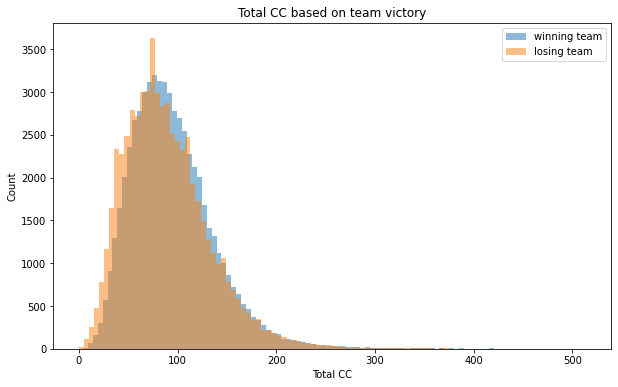

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(CCdf['win_totalCC'], alpha = 0.5, bins = 100, label = 'winning team')
plt.hist(CCdf['lose_totalCC'], alpha = 0.5, bins = 100, label = 'losing team')
plt.legend(loc = 'upper right')
plt.xlabel('Total CC')
plt.ylabel('Count')
plt.title('Total CC based on team victory')
plt.show()

In [ ]:
ustat = stats.mannwhitneyu(CCdf['win_totalCC'], CCdf['lose_totalCC'])
print(ustat)

MannwhitneyuResult(statistic=1651219052.0, pvalue=2.9670014295029823e-152)


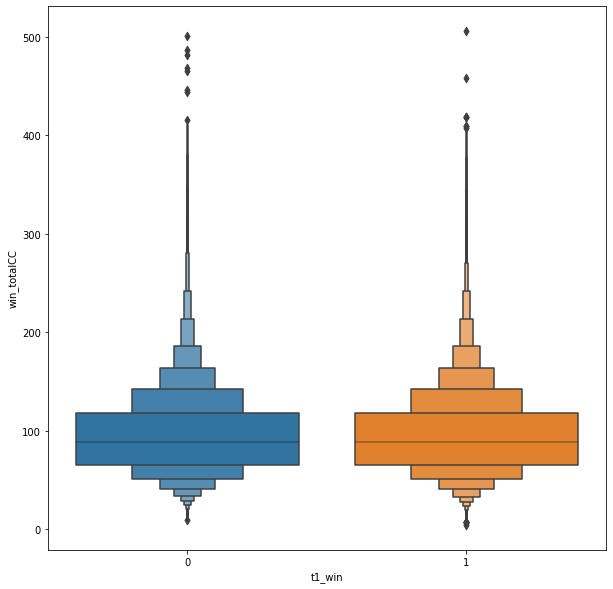

In [ ]:
plt.figure(figsize = (10, 10))
sns.boxenplot(x = 't1_win', y = 'win_totalCC', data = CCdf)

In [ ]:
def effect_size(n1, n2):
  u = ustat[0]
  n1 = len(n1)
  n2 = len(n2)
  return u/(n1*n2)

In [ ]:
effect_size(CCdf['win_totalCC'], CCdf['lose_totalCC'])

0.4562961344279946

Based on the MannWhitney U result, the p-value is very small, and so we can reject the null hypothesis. In addition, the effect size for this test is 0.46.

We can interpret this as there being a ~46% chance that a random picked CC score from the winning team is higher than that from the losing team. In addition, because we can reject the null hypothesis that there is no statistical significance in CC score between winning and losing teams.

In essence, what we can take away from this, is that crowd control is important in winning the game. It is proven that teams that have more crowd controlling abilities have a statistical advantage in winning their game.

## Hypothesis #2?

The CC dataset was divided into separate datasets based on region: Europe, Korea and North America

In [ ]:
EU_CC = CCdf.loc[CCdf['platformId'] == 'EUW1']
KR_CC = CCdf.loc[CCdf['platformId'] == 'KR']
NA_CC = CCdf.loc[CCdf['platformId'] == 'NA1']

Since we're comparing performances in terms of crowd control in each different region, we'll be taking a look at average CC time on the winning team per region.

The shapes of each distribution seem to be very similar, but with a slightly higher than normal kurtosis. That being said, these are not normally distributed, indicating that we will have to be going with a non-parametric test.

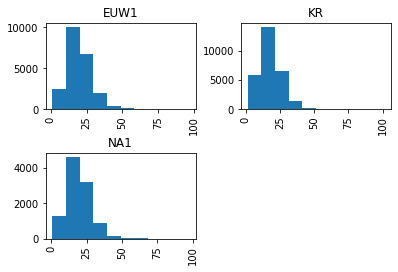

DescribeResult(nobs=21892, minmax=(1.2, 96.4), mean=20.03710031061575, variance=77.19118117617823, skewness=1.2919166809664664, kurtosis=3.799821645197893)
DescribeResult(nobs=28073, minmax=(1.4, 101.2), mean=18.06101236063121, variance=68.65741728514928, skewness=1.3224869134498825, kurtosis=4.346433106187044)
DescribeResult(nobs=10191, minmax=(0.8, 97.4), mean=19.57664606024924, variance=78.38470282260444, skewness=1.420030109712328, kurtosis=5.27331855743159)


In [ ]:
CCdf['win_avgCC'].hist(by = CCdf['platformId'])
plt.show()
print(stats.describe(EU_CC['win_avgCC']))
print(stats.describe(KR_CC['win_avgCC']))
print(stats.describe(NA_CC['win_avgCC']))

For this, a one-way ANOVA test cannot be conducted due to the distributions not being normal. That being said, we could perform a Kruskal-Wallis test, as well as perform a posthoc test for MannWhitney U values to see the non-parametric differences.

In [ ]:
stats.kruskal(EU_CC['win_avgCC'], KR_CC['win_avgCC'], NA_CC['win_avgCC'])

KruskalResult(statistic=785.1217681695974, pvalue=3.258173678845654e-171)

In [ ]:
sp.posthoc_mannwhitney(CCdf, val_col='win_avgCC', group_col='platformId', p_adjust = 'holm')

,EUW1,KR,NA1
EUW1,1.000000e+00,1.256804e-160,5.687406e-06
KR,1.256804e-160,1.000000e+00,1.358969e-58
NA1,5.687406e-06,1.358969e-58,1.000000e+00


From this summary table above, we can conclude that there is statistical significance between the regions in terms of their average CC score, rejecting the null, but how much they differ would result in bringing in more variables for extra testing.